# Stock Market Prediction & Forecasting Using LSTM

## Important Basic Library

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Stock prize prediction.csv')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Unnamed: 8
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,NaN
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,NaN
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,NaN
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,NaN
...,...,...,...,...,...,...,...,...,...
2030,7/27/2010,117.60,119.50,112.00,118.80,118.65,586100,694.98,NaN
2031,7/26/2010,120.10,121.00,117.10,117.10,117.60,658440,780.01,NaN
2032,7/23/2010,121.80,121.95,120.25,120.35,120.65,281312,340.31,NaN
2033,7/22/2010,120.30,122.00,120.25,120.75,120.90,293312,355.17,NaN


In [ ]:
df = df.reset_index()['Close']
df

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

## Checking null values

In [ ]:
df.isnull().sum()

0

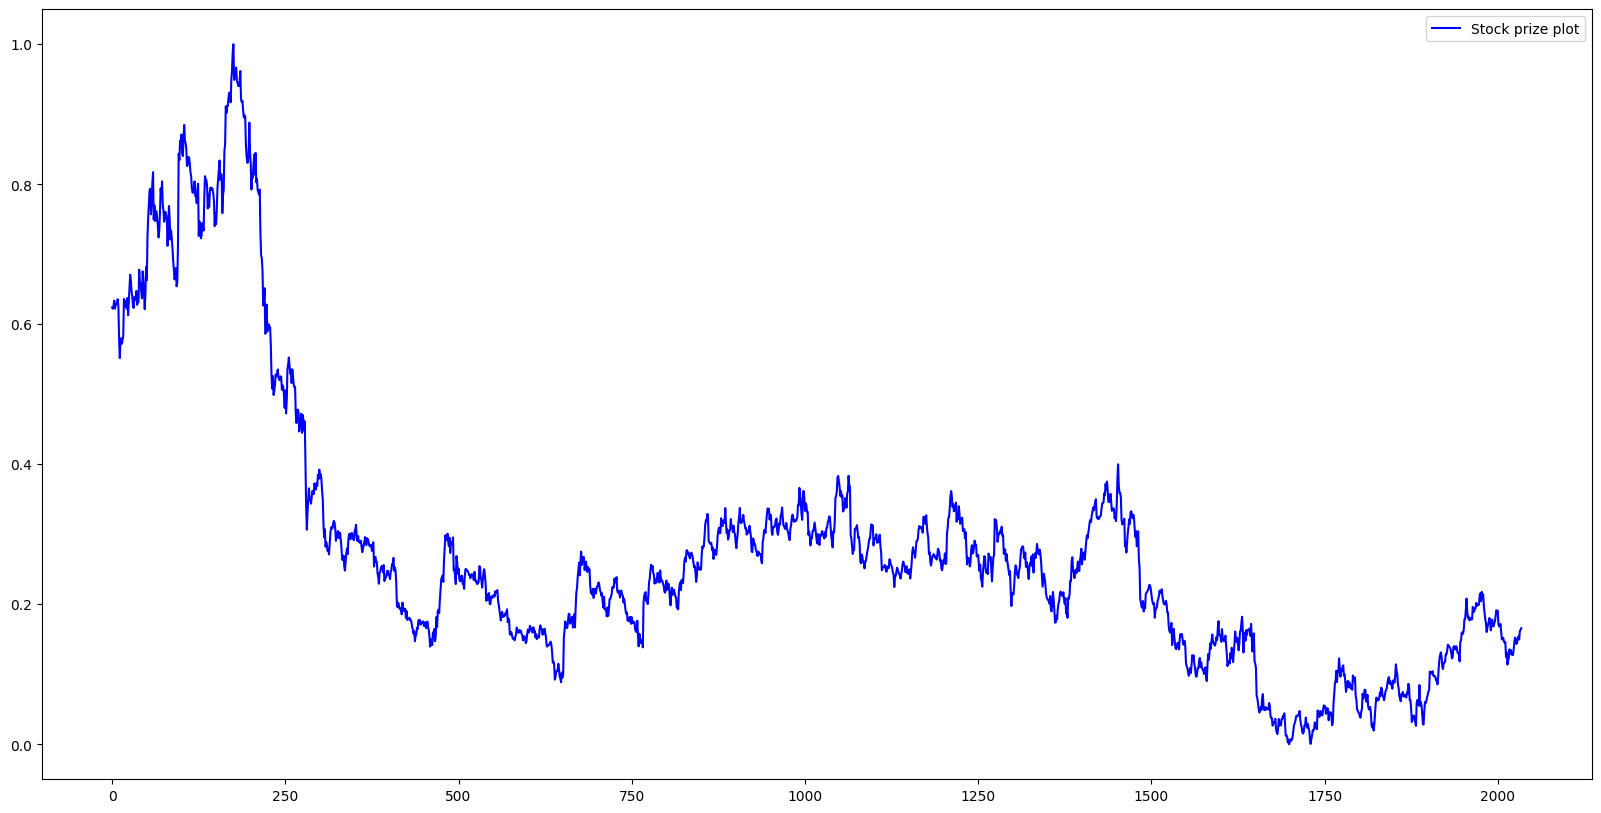

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df,color='blue',label='Stock prize plot')
plt.legend()

## Data PreProcessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## Training and Testing

In [ ]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]


In [ ]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [ ]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
23/23 [==============================] - 19s 471ms/step - loss: 0.0261 - val_loss: 0.0060
Epoch 2/100
23/23 [==============================] - 10s 435ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 3/100
23/23 [==============================] - 10s 425ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 4/100
23/23 [==============================] - 9s 376ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 11s 486ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 10s 431ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 11s 474ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 10s 417ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/100
23/23 [==============================] - 9s 377ms/step - loss: 0.0010 - val_loss: 8.9317e-04
Epoch 10/100
23/23 [==============================] - 10s 432ms/step - loss: 0.0

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## Calculating Root Mean Square Error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

164.85690437413965

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

106.40613457015556

## Plotting Graph

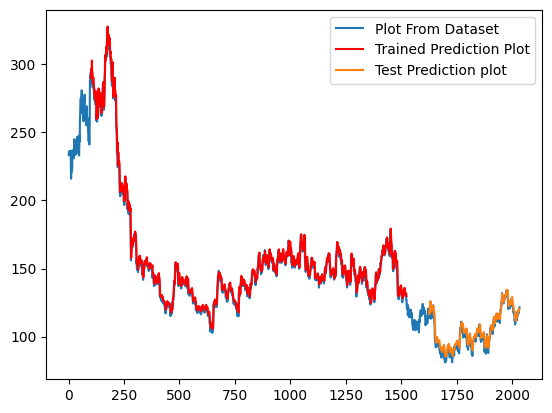

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df),label='Plot From Dataset')
plt.plot(trainPredictPlot,'r',label='Trained Prediction Plot')

plt.plot(testPredictPlot,label='Test Prediction plot')
plt.legend()
plt.show()

In [ ]:
len(test_data)

509

In [ ]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.17029005]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,121)
len(df)

2035

## Plotting Graph

## Graph for 100 Days

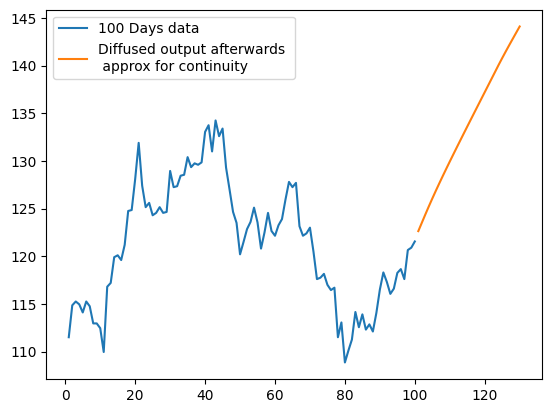

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[1935:]),label='100 Days data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Diffused output afterwards \n approx for continuity')
plt.legend()

## Graph For 20 days

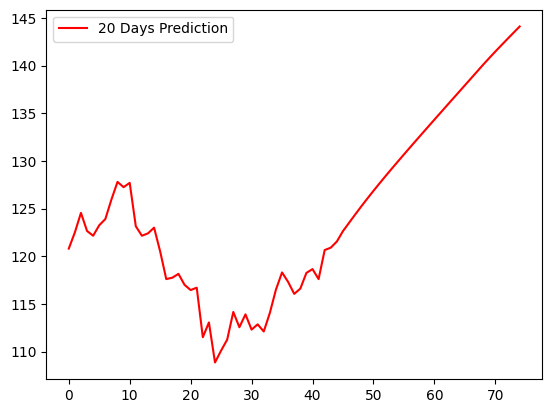

In [ ]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='20 Days Prediction')
plt.legend()

## Graph for 120 days

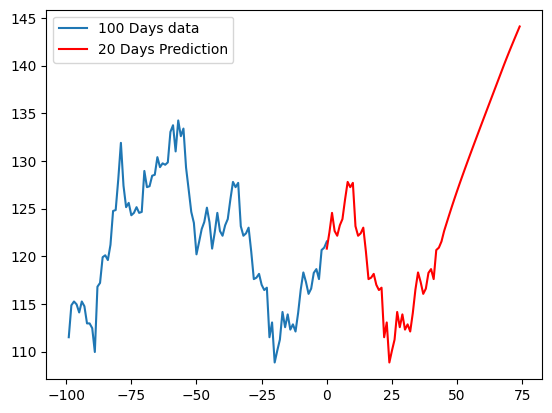

In [ ]:
plt.plot(day_new-100,scaler.inverse_transform(df[1935:]),label='100 Days data')
plt.plot(scaler.inverse_transform(df1[1990:]),color='red',label='20 Days Prediction')
plt.legend()